In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris_data = pd.read_csv("C:/Users/h/1_WORKING FILE/4_Ex_Files_Deep_Learning_Getting_Started/Exercise Files/iris.csv")

In [3]:
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df = iris_data.copy()

In [5]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [8]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
np_df = df.to_numpy()

In [10]:
X_data = np_df[:,:-1]
Y_data =  np_df[:,4]

In [11]:
X_data[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
Y_data[:5]

array([0., 0., 0., 0., 0.])

In [13]:
scaler = StandardScaler().fit(X_data)

In [14]:
X_data = scaler.transform(X_data)

In [15]:
Y_data = scaler = tf.keras.utils.to_categorical(Y_data, 3)

In [16]:
X_data[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [17]:
Y_data[:5, :]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.10)

In [19]:
X_train.shape, Y_train.shape, X_test.shape, Y_train.shape

((135, 4), (135, 3), (15, 4), (135, 3))

In [20]:
df.info

<bound method DataFrame.info of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

## Creating model

In [21]:
from tensorflow import keras

NB_classes = 3

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(128, 
                             input_shape = (4,),
                             name = 'Hidden-layer-1',
                             activation = 'relu'))

model.add(keras.layers.Dense(128,
                             name = "hidden-layer-2",
                             activation="relu"))

model.add(keras.layers.Dense(NB_classes,
                             name="output-layer",
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 128)               640       
_________________________________________________________________
hidden-layer-2 (Dense)       (None, 128)               16512     
_________________________________________________________________
output-layer (Dense)         (None, 3)                 387       
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


## Training and evaluating the Model

In [22]:
history = model.fit(X_train, Y_train, batch_size = 16, epochs = 20, verbose = 2, validation_split = 0.2)

Epoch 1/20
7/7 - 0s - loss: 0.8442 - accuracy: 0.7130 - val_loss: 0.7149 - val_accuracy: 0.7037
Epoch 2/20
7/7 - 0s - loss: 0.5371 - accuracy: 0.8241 - val_loss: 0.5842 - val_accuracy: 0.7407
Epoch 3/20
7/7 - 0s - loss: 0.4231 - accuracy: 0.8426 - val_loss: 0.5068 - val_accuracy: 0.7407
Epoch 4/20
7/7 - 0s - loss: 0.3618 - accuracy: 0.8796 - val_loss: 0.4747 - val_accuracy: 0.7037
Epoch 5/20
7/7 - 0s - loss: 0.3212 - accuracy: 0.8704 - val_loss: 0.4467 - val_accuracy: 0.7037
Epoch 6/20
7/7 - 0s - loss: 0.2867 - accuracy: 0.8796 - val_loss: 0.4285 - val_accuracy: 0.7037
Epoch 7/20
7/7 - 0s - loss: 0.2690 - accuracy: 0.8981 - val_loss: 0.4189 - val_accuracy: 0.7037
Epoch 8/20
7/7 - 0s - loss: 0.2404 - accuracy: 0.8981 - val_loss: 0.4124 - val_accuracy: 0.7037
Epoch 9/20
7/7 - 0s - loss: 0.2223 - accuracy: 0.8981 - val_loss: 0.3786 - val_accuracy: 0.8148
Epoch 10/20
7/7 - 0s - loss: 0.2052 - accuracy: 0.9444 - val_loss: 0.3697 - val_accuracy: 0.8148
Epoch 11/20
7/7 - 0s - loss: 0.1924 - a

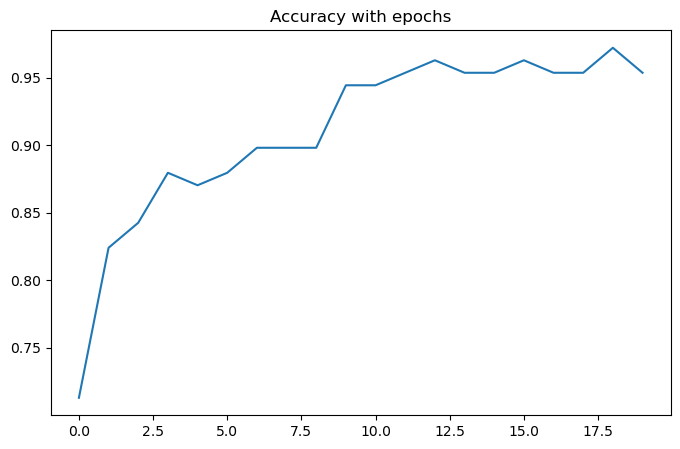


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 0s/step - loss: 0.0569 - accuracy: 1.0000


[0.05694689229130745, 1.0]

In [23]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy with epochs")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test, Y_test)

## Saving model and Loading again

In [24]:
os.environ['TF_CPP_MIN_LOG_LEVEL']  ='3'

model.save("iris_saved_1")

load_model = keras.models.load_model("iris_saved_1")

load_model.summary()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: iris_saved_1\assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 128)               640       
_________________________________________________________________
hidden-layer-2 (Dense)       (None, 128)               16512     
_________________________________________________________________
output-layer (Dense)         (None, 3)                 387       
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


## Prediction

In [29]:
prediction_input = [[6.6, 3., 4.4, 1.4]]
scaler = StandardScaler().fit(prediction_input)

scaled_input = scaler.transform(prediction_input)

raw_pred = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

prediction = np.argmax(raw_pred)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


Raw Prediction Output (Probabilities) : [[0.05209902 0.9012092  0.04669176]]
Prediction is  ['versicolor']
